In [1]:
import os

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../.."))

# Change the working directory to the parent directory
os.chdir(parent_dir)

# Imports

In [5]:
%load_ext autoreload
%autoreload 2

import datetime

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

from dataloader.load_regression_data_from_arbitrary_gp_varying_kernel import RegressionDataGeneratorArbitraryGPWithVaryingKernel

from utils.plot import plot_learning_curve
from utils.plot import plot_gp_vs_cnp_vs_lnp_varying_kernel

from utils.gaussian_processes.gp_model import plot_mean_with_std
from utils.gaussian_processes.plot_gp_utils import plot_preds_from_ds_test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DataGenerator

In [8]:
data_generator = RegressionDataGeneratorArbitraryGPWithVaryingKernel(
    iterations=25,
    batch_size=32,
    min_num_context=3,
    max_num_context=40,
    min_num_target=2,
    max_num_target=40,
    min_x_val_uniform=-2,
    max_x_val_uniform=2,
    min_kernel_length_scale=0.1,
    max_kernel_length_scale=1.
)

In [9]:
(context_x, context_y, target_x), target_y = next(iter(data_generator.train_ds))

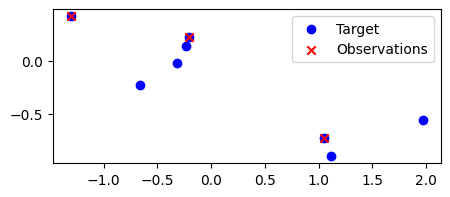

In [10]:
data_generator.plot_first_elt_of_random_batch(figsize=(5, 2));

2023-03-25 20:12:12.446896: W tensorflow/core/framework/op_kernel.cc:1768] UNKNOWN: InvalidArgumentError: {{function_node __wrapped__ConcatV2_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} ConcatOp : Ranks of all input tensors should match: shape[0] = [32,20,1] vs. shape[1] = [32,1] [Op:ConcatV2] name: concat
Traceback (most recent call last):

  File "/home/studio-lab-user/.conda/envs/tfp/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 271, in __call__
    ret = func(*args)

  File "/home/studio-lab-user/.conda/envs/tfp/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/home/studio-lab-user/.conda/envs/tfp/lib/python3.10/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/studio-lab-user/sagemaker-studiolab-notebooks/conditional-neural-processes/dataloader

UnknownError: {{function_node __wrapped__IteratorGetNext_output_types_4_device_/job:localhost/replica:0/task:0/device:CPU:0}} InvalidArgumentError: {{function_node __wrapped__ConcatV2_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} ConcatOp : Ranks of all input tensors should match: shape[0] = [32,20,1] vs. shape[1] = [32,1] [Op:ConcatV2] name: concat
Traceback (most recent call last):

  File "/home/studio-lab-user/.conda/envs/tfp/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 271, in __call__
    ret = func(*args)

  File "/home/studio-lab-user/.conda/envs/tfp/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/home/studio-lab-user/.conda/envs/tfp/lib/python3.10/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/studio-lab-user/sagemaker-studiolab-notebooks/conditional-neural-processes/dataloader/load_regression_data_from_arbitrary_gp_varying_kernel.py", line 97, in gen_from_arbitrary_gp
    y_values = tf.concat([y_values_1, y_values_2], axis=1)

  File "/home/studio-lab-user/.conda/envs/tfp/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py", line 153, in error_handler
    raise e.with_traceback(filtered_tb) from None

  File "/home/studio-lab-user/.conda/envs/tfp/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 7209, in raise_from_not_ok_status
    raise core._status_to_exception(e) from None  # pylint: disable=protected-access

tensorflow.python.framework.errors_impl.InvalidArgumentError: {{function_node __wrapped__ConcatV2_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} ConcatOp : Ranks of all input tensors should match: shape[0] = [32,20,1] vs. shape[1] = [32,1] [Op:ConcatV2] name: concat


	 [[{{node PyFunc}}]] [Op:IteratorGetNext]

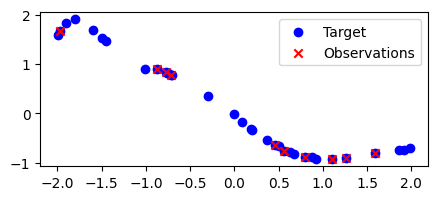

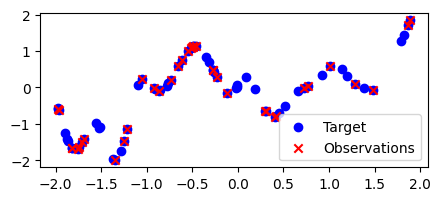

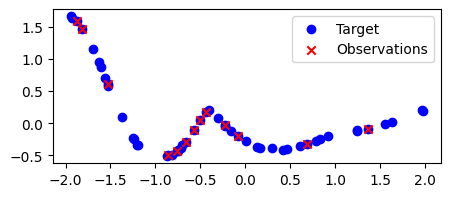

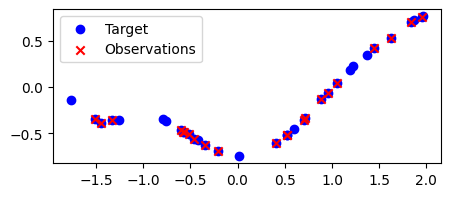

In [16]:
for (context_x, context_y, target_x), target_y in data_generator.train_ds.take(5):
    RegressionDataGeneratorArbitraryGPWithVaryingKernel.plot_first_elt_of_batch(context_x, context_y, target_x, target_y,
                                                                                figsize=(5, 2));